In [1]:
import yaml
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import index
import plots
import tools

# teleconnection config details

diagname  = 'teleconnections'
machine   = 'wilma'

# Opening yml files
config   = tools.load_config(machine)
namelist = tools.load_namelist(diagname)

## NAO

/work/users/mnurisso/mambaforge/envs/teleconnections/lib/python3.10/site-packages/xarray/core/indexing.py:1372: PerformanceWarning: Slicing with an out-of-order index is generating 43 times more chunks
  return self.array[key]


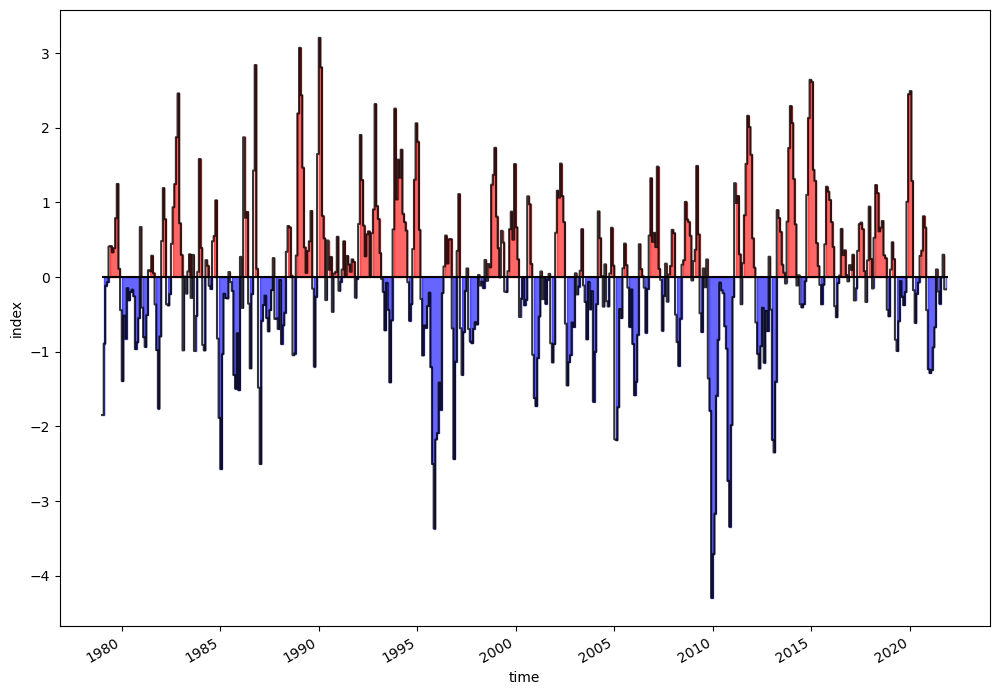

In [2]:
# Configuration specific to the NAO teleconnection
telecname = 'NAO'
fieldname = namelist[telecname]['field']

# Opening dataset file
infile = config[diagname][telecname]['input']
field = xr.open_mfdataset(infile)[fieldname]

# Evaluating NAO
NAO = index.station_based_index(field,namelist,telecname=telecname)
plots.index_plot(NAO,title='NAO index',save=True)

# Save NAO
outfile = config[diagname]['output']
filename = '/NAO_indx.nc'
outfile = outfile+filename

NAO.to_netcdf(outfile, mode='w')

<xarray.DataArray (lat: 721, lon: 1440)>
dask.array<truediv, shape=(721, 1440), dtype=float64, chunksize=(721, 1440), chunktype=numpy.ndarray>
Coordinates:
  * lon      (lon) float64 0.0 0.25 0.5 0.75 1.0 ... 359.0 359.2 359.5 359.8
  * lat      (lat) float64 90.0 89.75 89.5 89.25 ... -89.25 -89.5 -89.75 -90.0

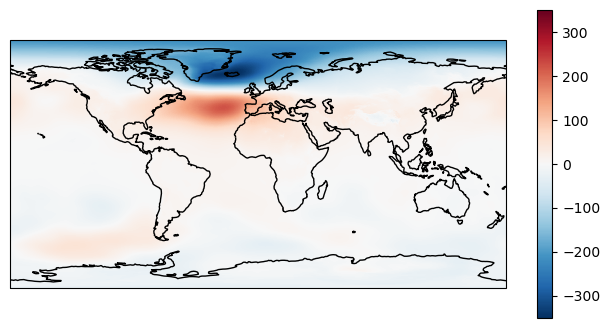

In [8]:
plots.reg_plot(NAO,field)

## ENSO

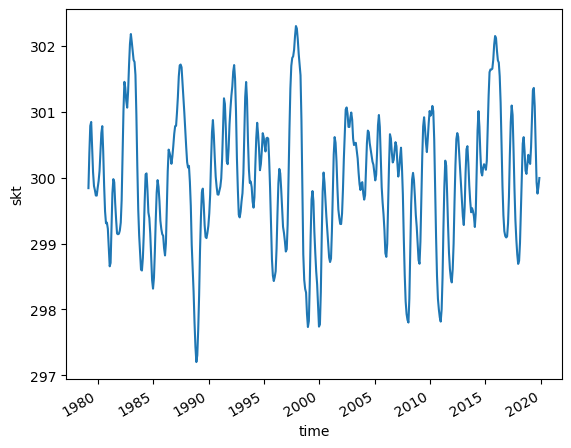

In [2]:
# Configuration specific to the NAO teleconnection
telecname = 'ENSO'
fieldname = namelist[telecname]['field']

# Opening dataset file
infile = config[diagname][telecname]['input']
field = xr.open_mfdataset(infile)[fieldname]

# Evaluating ENSO
ENSO = index.regional_mean_index(field,namelist,telecname)
ENSO.plot()


In [4]:
# Save output
outfile = config[diagname]['output']
filename = '/NINO_indx.nc'
outfile = outfile+filename

ENSO.to_netcdf(outfile)